In [9]:
import importlib
import copy
import numpy as np

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

# Classification of Ski Area Rankings

<img src="https://static.evo.com/content/travel-guides/id/schweitzer/691398.jpeg" width="800"/>

### Authors: Gabriel Hoing and Sean Cowan

### Class: CPSC 322, Fall 2024

## 1. Introduction

The dataset we used has 3285 ski areas with the following attributes.   
* rank
* name
* rating
* url
* location_coordinate
* location_country
* location_region
* elevation_top_m
* elevation_top_difference_m
* total_slope_length_km
* number_of_lifts
* number_of_slopes
* annual_snowfall_cm
* number_of_matches

Of the available attributes, we opted to classify ski area's based on rating 
because this seemed to be the best attribute that signified how "good" a ski area 
is.     
We discretized rating into 5 evenly distributed categories...   
"very low", "low", "average", "high", "very high"   
... by calculating each category's percentiles. 

e.g. if x is in "average", then (40th percentile) < x < (60th percentile)

For attributes, we chose to classify on the following...
* elevation_top_m
* elevation_top_difference_m
* total_slope_length_km
* number_of_lifts
* number_of_slopes
* annual_snowfall_cm

These attributes all intuitively would have some relationship with 
ski restort rating.     
To examine their relationship further, we can examine their correlations with rating.

In [ ]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "elevation_difference_m", "total_slope_length_km", "number_of_lifts", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "very high", "high", "average", "low", "very low", "Total", "Recognition (%)"]

print(ski_X[3])
print(ski_y[3])


discretizer = myutils.discretize_ranking

X_copy = copy.deepcopy(ski_X)
y_copy = copy.deepcopy(ski_y)
for i, row in enumerate(X_copy):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_elevation_difference(row[1])
    row[2] = myutils.discretize_slope_length(row[2])
    row[3] = myutils.discretize_num_lifts(row[3])
    row[4] = myutils.discretize_num_slopes(row[4])
    row[5] = myutils.discretize_snowfall(row[5])
    y_copy[i] = discretizer(y_copy[i])
print (y_copy[3])


[3842.0, 2807.0, 152.0, 65.0, 102.0, 450.0]
1214.2
very high


# Dummy Classification

In [11]:
dummy_clf = MyDummyClassifier()
dummy_actual, dummy_pred, dummy_accuracy, dummy_error = myevaluation.display_cross_val(X_copy, y_copy, dummy_clf, matrix_headers)

Accuracy: 0.19792935444579782, Error Rate: 0.8020706455542022

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high            0     198        264    195           0      657                  0
high                 0     195        264    198           0      657                 29
average              0     198        260    198           0      656                 39
low                  0     198        264    195           0      657                 29
very low             0     195        264    198           0      657                  0


## kNN Classification

In [ ]:
knn_clf = MyKNeighborsClassifier(categorical=True)
knn_actual, knn_pred, knn_actual, knn_error = myevaluation.display_cross_val(X_copy, y_copy, knn_clf, matrix_headers)

Accuracy: 0.4284409257003654, Error Rate: 0.5715590742996346

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          585      65          7      0           0      657                 89
high               271     267        101     15           3      657                 40
average             77     246        255     68          10      656                 38
low                  4     110        288    224          31      657                 34
very low             1      44        113    423          76      657                 11


# Naive Bayes Classification

In [ ]:
nb_clf = MyNaiveBayesClassifier()
nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.display_cross_val(X_copy, y_copy, nb_clf, matrix_headers)

Accuracy: 0.6017052375152253, Error Rate: 0.3982947624847747

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          535     102         16      0           4      657                 81
high               146     314        147     32          18      657                 47
average             14     181        288    156          17      656                 43
low                  2       9        155    318         173      657                 48
very low             2       0         10    124         521      657                 79


# Decision Tree Classification

In [ ]:
tree_clf = MyDecisionTreeClassifier()
tree_actual, tree_pred, tree_accuracy, tree_error = myevaluation.display_cross_val(X_copy, y_copy, tree_clf, matrix_headers)

Accuracy: 0.5959196102314251, Error Rate: 0.40408038976857485

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          538     103         13      3           0      657                 81
high               114     340        140     50          13      657                 51
average             12     170        231    206          37      656                 35
low                  3      18         93    371         172      657                 56
very low             1       0          3    176         477      657                 72


# Random Forest Classification

In [ ]:
forest_clf = MyRandomForestClassifier(50, 3, 4)
forest_actual, forest_pred, forest_accuracy, forest_error = myevaluation.display_cross_val(X_copy, y_copy, forest_clf, matrix_headers)

Accuracy: 0.5931790499390986, Error Rate: 0.40682095006090135

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          517     119         19      2           0      657                 78
high                99     347        147     51          13      657                 52
average              9     154        266    192          35      656                 40
low                  0      18        131    320         188      657                 48
very low             0       2          7    150         498      657                 75


## Data Visualizations

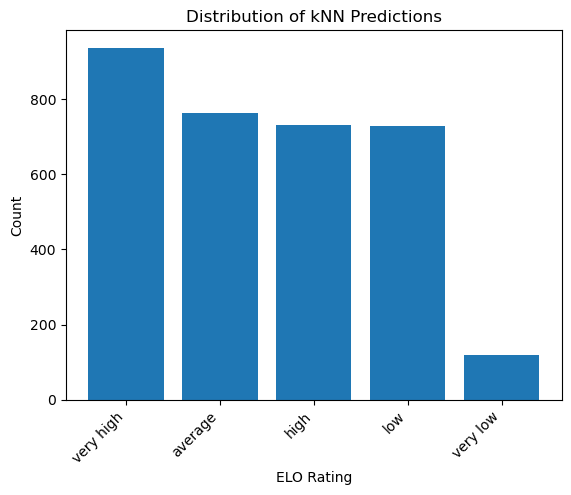

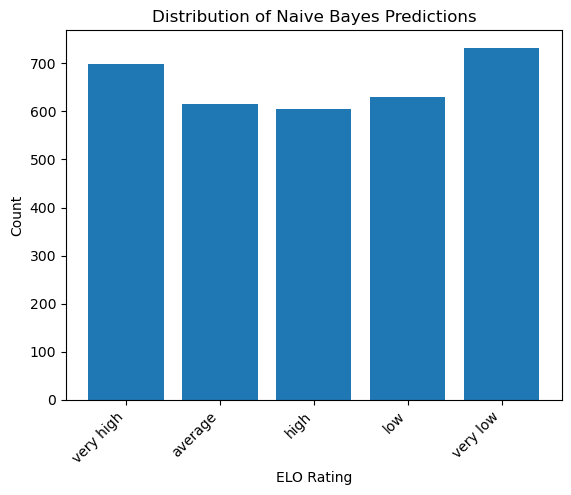

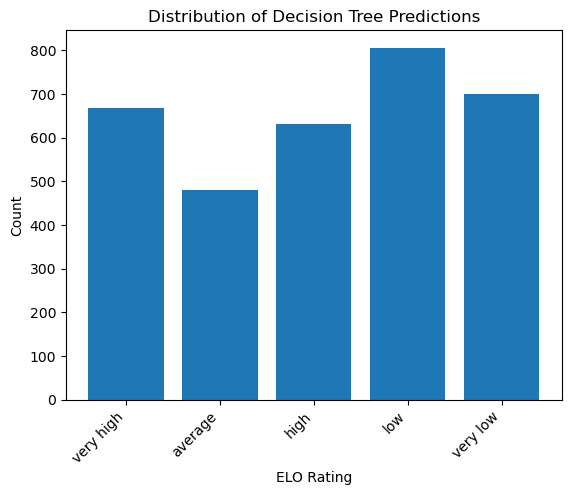

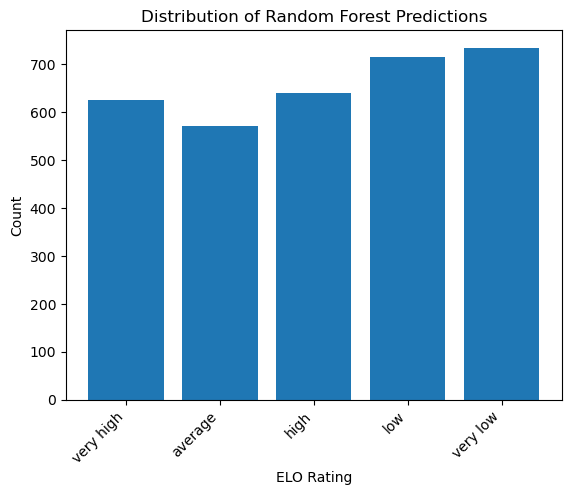

In [ ]:
myevaluation.display_distributions(knn_pred, "kNN")
myevaluation.display_distributions(nb_pred, "Naive Bayes")
myevaluation.display_distributions(tree_pred, "Decision Tree")
myevaluation.display_distributions(forest_pred, "Random Forest")